## Notebook for Figure 1

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np 

#Plotting libraries
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from one_pass import __version__ as one_pass_version
from one_pass.opa import Opa
from utils import read_or_download_dataset

print(f"One_Pass version: {one_pass_version}")

One_Pass version: 0.7.2


Load data for plotting. 

The reason here we are loading the pre-computed one-pass mean and conventional mean is, due to the 0.1degree resolution of the data set, storing the full data set (37.2 GB) on Zenodo seemed excessive. As the one-pass mean algorithm is used in the calculation of variance (and standard deviation), this calculation it is shown in Figure 2, using a lower spatial resolution data set.

In [2]:
# read data 
url1 = "https://zenodo.org/records/12533197/files/2t_march_2020_IFS_tco2559_ng5_cycle3_r010_one_pass_mean.nc?download=1"
data1p = read_or_download_dataset("2t_2020_one_pass_mean.nc", url1)

url2 = "https://zenodo.org/records/12533197/files/2t_march_2020_IFS_tco2559_ng5_cycle3_r010_conventional_mean.nc?download=1"
data2p = read_or_download_dataset("2t_2020_conventional_mean.nc", url2)

Plot data

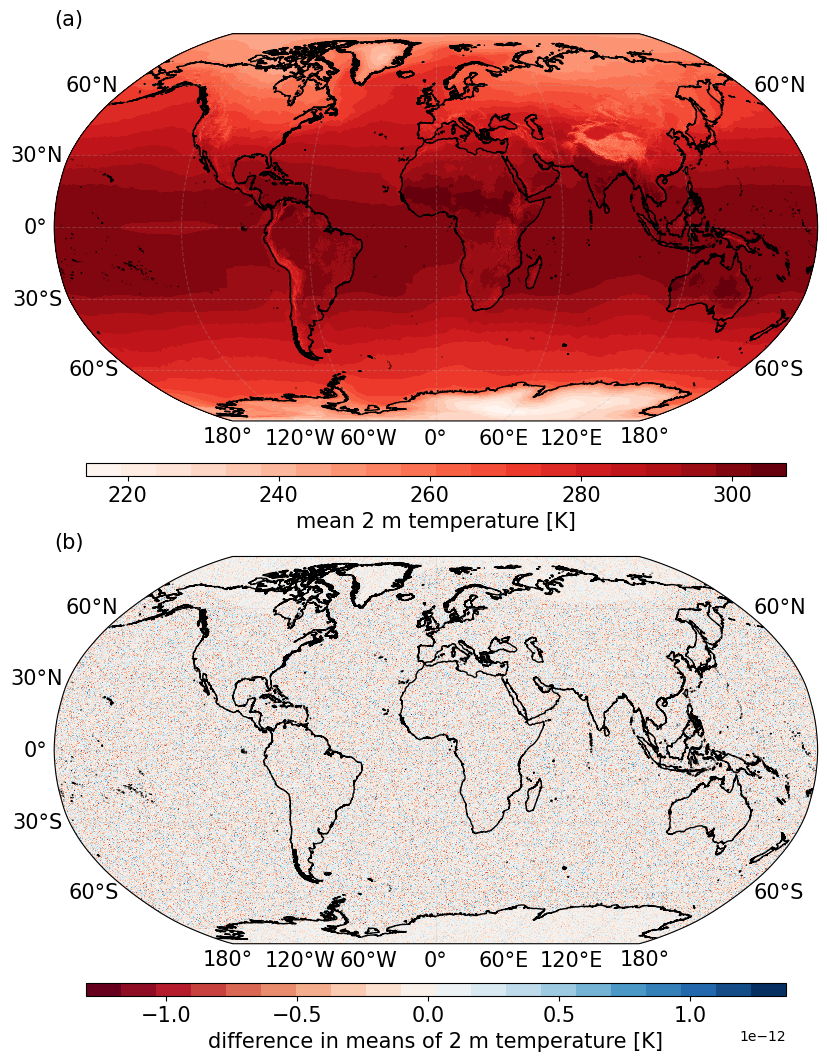

In [3]:
 #Projection
data_crs = ccrs.Robinson()
fig = plt.figure(constrained_layout=False,figsize=(20,13))
fig.subplots_adjust(bottom=0.2, top=0.9, left=0.1, right=0.9, hspace = 0.4)

nrow = 2
ncol = 1
outer = gs.GridSpec(nrow,ncol,wspace=0.01,hspace=0.35)
fsize = 15

# get the data to plot
one_pass_data = data1p['2t'][0,:,:].values
difference = data1p - data2p
difference = difference['2t'][0,:,:]

for i in range(nrow*ncol):
    ax = plt.subplot(outer[i],projection = data_crs)
    ax.coastlines(resolution = '10m') #Draws the coastline.

    gl = ax.gridlines(draw_labels = True, linestyle='dashed', alpha=0.25)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': fsize}
    gl.ylabel_style = {'size': fsize}

    lon2d,lat2d = np.meshgrid(data1p.lon, data1p.lat)

    cmap = plt.get_cmap('Reds', 20)
    cmap1 = plt.get_cmap('RdBu', 20)
    
    if i == 0:
        cs = ax.pcolormesh(lon2d, lat2d, one_pass_data, transform=ccrs.PlateCarree(),cmap=cmap)
        ax.set_title('(a)', fontsize = fsize, loc = 'left')

    else: 
        cs = ax.pcolormesh(lon2d, lat2d, difference, transform=ccrs.PlateCarree(),cmap=cmap1)
        ax.set_title('(b)', fontsize = fsize, loc = 'left')

    # Add color bar for each subplot
    spacing = 0.4
    y_dis = 0.56 - i * (spacing)
    # Adjust the positions for colorbars
    cbar_ax = fig.add_axes([0.325, y_dis, 0.35, 0.01])

    if i == 0:
        cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal') 
        cbar.set_label("mean 2 m temperature [K]", rotation=0, fontsize = fsize)
        cbar.ax.tick_params(labelsize=fsize)
        
    else:
        cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal') 
        cbar.set_label("difference in means of 2 m temperature [K]", rotation=0, fontsize = fsize)
        cbar.ax.tick_params(labelsize=fsize)

cbar.ax.tick_params(axis='x', labelsize=fsize)
cbar.update_ticks()

plt.show()